### Split-Combine-Apply using Pandas

In [2]:
# https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
import pandas as pd
import dateutil

In [3]:
data = pd.read_csv('../data/phone_data.csv')
# Convert date from string to date times
data['date'] = data['date'].apply(dateutil.parser.parse, dayfirst=True)

In [4]:
data.head()

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


In [7]:
print(data.shape)
print(data.size)
print(data.dtypes) # object means string
print(data.info())
print(data.describe())

(830, 7)
5810
index                    int64
date            datetime64[ns]
duration               float64
item                    object
month                   object
network                 object
network_type            object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         830 non-null    int64         
 1   date          830 non-null    datetime64[ns]
 2   duration      830 non-null    float64       
 3   item          830 non-null    object        
 4   month         830 non-null    object        
 5   network       830 non-null    object        
 6   network_type  830 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 45.5+ KB
None
            index      duration
count  830.000000    830.000000
mean   414.500000    117.804036
std    239.744656 

<AxesSubplot:>

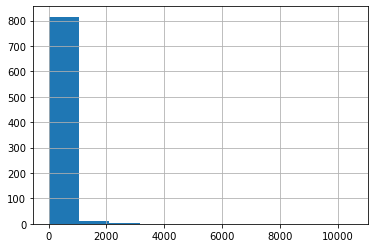

In [34]:
data['duration'].plot()
data['duration'].hist()

In [35]:
# How many rows in the dataset
data['item'].count()

830

In [36]:
# What was the longest phone call / data entry?
data['duration'].max()

10528.0

In [40]:
# how many types of types in item ?
data['item'].nunique()

3

In [41]:
# and they are ?
data['item'].unique()

array(['data', 'call', 'sms'], dtype=object)

In [42]:
# and how many of each ?
data['item'].value_counts()

call    388
sms     292
data    150
Name: item, dtype: int64

In [45]:
# first 5 items of the calls
data[data['item'] == 'call'].head()

,index,date,duration,item,month,network,network_type
1,1,2014-10-15 06:58:00,13.0,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.0,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.0,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.0,call,2014-11,Tesco,mobile
5,5,2014-10-15 18:55:00,4.0,call,2014-11,Tesco,mobile


In [39]:
# How many seconds of phone calls are recorded in total?
data['duration'][data['item'] == 'call'].sum() 

92321.0

In [47]:
# How many entries are there for each month?
data['month'].value_counts()

2014-11    230
2015-01    205
2014-12    157
2015-02    137
2015-03    101
Name: month, dtype: int64

In [52]:
# how many unique values in the month column
data['month'].unique()

array(['2014-11', '2014-12', '2015-01', '2015-02', '2015-03'],
      dtype=object)

In [50]:
# Groupby essentially splits the data into different groups depending on a variable of your choice. 
# For example, the expression data.groupby(‘month’)  will split our current DataFrame by month.
data.groupby(['month']).groups.keys()

dict_keys(['2014-11', '2014-12', '2015-01', '2015-02', '2015-03'])

In [51]:
# breakdown the data into groups of months with groupby() then list only the group '2014-11' then check how many values in that group
len(data.groupby(['month']).groups['2014-11'])

230

In [53]:
# Get the first entry for each month after breaking down the month into different groups
data.groupby('month').first()

,index,date,duration,item,network,network_type
month,,,,,,
2014-11,0,2014-10-15 06:58:00,34.429,data,data,data
2014-12,228,2014-11-13 06:58:00,34.429,data,data,data
2015-01,381,2014-12-13 06:58:00,34.429,data,data,data
2015-02,577,2015-01-13 06:58:00,34.429,data,data,data
2015-03,729,2015-02-12 20:15:00,69.000,call,landline,landline


In [54]:
# Get the sum of the durations per month
data.groupby('month')['duration'].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

In [76]:
# Get the number of dates / entries in each month
data.groupby('month')['date'].count()

month
2014-11    230
2014-12    157
2015-01    205
2015-02    137
2015-03    101
Name: date, dtype: int64

In [77]:
# Get thefirst date of entries in each month group
data.groupby('month')['date'].first()

month
2014-11   2014-10-15 06:58:00
2014-12   2014-11-13 06:58:00
2015-01   2014-12-13 06:58:00
2015-02   2015-01-13 06:58:00
2015-03   2015-02-12 20:15:00
Name: date, dtype: datetime64[ns]

In [78]:
# What is the sum of durations, for calls only, to each network
# filter the data where item == call only. Then group the data by network. Then for each network , find the sum of the duration column
data[data['item'] == 'call'].groupby('network')['duration'].sum()

network
Meteor        7200.0
Tesco        13828.0
Three        36464.0
Vodafone     14621.0
landline     18433.0
voicemail     1775.0
Name: duration, dtype: float64

In [84]:
# How many calls, sms, and data entries are in each month?
# in each month , so groupby month. But want to break down the items by type , so also groupby item. Then count number of items per date column
data.groupby(['month', 'item'])['date'].count()

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: date, dtype: int64

In [87]:
# How many calls, texts, and data are sent per month, split by network_type?
# per month , so groupby month. also by network_type , so another add network_type to groupby. 
# then count the date column for each of the network_type
data.groupby(['month', 'network_type'])['date'].count()

month    network_type
2014-11  data             29
         landline          5
         mobile          189
         special           1
         voicemail         6
2014-12  data             30
         landline          7
         mobile          108
         voicemail         8
         world             4
2015-01  data             31
         landline         11
         mobile          160
         voicemail         3
2015-02  data             31
         landline          8
         mobile           90
         special           2
         voicemail         6
2015-03  data             29
         landline         11
         mobile           54
         voicemail         4
         world             3
Name: date, dtype: int64

In [88]:
# produces Pandas Series - only 1 []
data.groupby('month')['duration'].sum() 
# Produces Pandas DataFrame - 2 [[]]
data.groupby('month')[['duration']].sum()

,duration
month,
2014-11,26639.441
2014-12,14641.870
2015-01,18223.299
2015-02,15522.299
2015-03,22750.441


In [90]:
'''
The groupby output will have an index or multi-index on rows corresponding to your chosen grouping variables. 
To avoid setting this index, pass “as_index=False” to the groupby operation.
'''
data.groupby('month', as_index=False).agg({"duration": "sum"})

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [91]:
# without as_index == False
data.groupby('month').agg({"duration": "sum"})

,duration
month,
2014-11,26639.441
2014-12,14641.870
2015-01,18223.299
2015-02,15522.299
2015-03,22750.441


#### Look at agg() function

In [100]:
# Group the data frame by month and item and extract a number of stats from each group
data.groupby(
   ['month', 'item']
).agg(
    {
         'duration':sum,    # Sum duration per group
         'network_type': "count",  # get the count of networks
         'date': 'first'  # get the first date per group
    }
)

duration  network_type                date
month   item                                             
2014-11 call  25547.000           107 2014-10-15 06:58:00
        data    998.441            29 2014-10-15 06:58:00
        sms      94.000            94 2014-10-16 22:18:00
2014-12 call  13561.000            79 2014-11-14 17:24:00
        data   1032.870            30 2014-11-13 06:58:00
        sms      48.000            48 2014-11-14 17:28:00
2015-01 call  17070.000            88 2014-12-15 20:03:00
        data   1067.299            31 2014-12-13 06:58:00
        sms      86.000            86 2014-12-15 19:56:00
2015-02 call  14416.000            67 2015-01-15 10:36:00
        data   1067.299            31 2015-01-13 06:58:00
        sms      39.000            39 2015-01-15 12:23:00
2015-03 call  21727.000            47 2015-02-12 20:15:00
        data    998.441            29 2015-02-13 06:58:00
        sms      25.000            25 2015-02-19 18:46:00

In [102]:
# Define the aggregation procedure outside of the groupby operation
aggregations = {
    'duration':'sum',
    
}
data.groupby('month').agg(aggregations)

,duration
month,
2014-11,26639.441
2014-12,14641.870
2015-01,18223.299
2015-02,15522.299
2015-03,22750.441


In [103]:
# Group the data frame by month and item and extract a number of stats from each group
data.groupby(
    ['month', 'item']
).agg(
    {
        # Find the min, max, and sum of the duration column
        'duration': [min, max, sum],
        # find the number of network type entries
        'network_type': "count",
        # minimum, first, and number of unique dates
        'date': [min, 'first', 'nunique']
    }
)

duration                       network_type                date  \
                  min        max        sum        count                 min   
month   item                                                                   
2014-11 call    1.000   1940.000  25547.000          107 2014-10-15 06:58:00   
        data   34.429     34.429    998.441           29 2014-10-15 06:58:00   
        sms     1.000      1.000     94.000           94 2014-10-16 22:18:00   
2014-12 call    2.000   2120.000  13561.000           79 2014-11-14 17:24:00   
        data   34.429     34.429   1032.870           30 2014-11-13 06:58:00   
        sms     1.000      1.000     48.000           48 2014-11-14 17:28:00   
2015-01 call    2.000   1859.000  17070.000           88 2014-12-15 20:03:00   
        data   34.429     34.429   1067.299           31 2014-12-13 06:58:00   
        sms     1.000      1.000     86.000           86 2014-12-15 19:56:00   
2015-02 call    1.000   1863.000  14416.000           67 2015-01-15 10:36:00   
        data   34.429     34.429   1067.299           31 2015-01-13 06:58:00   
        sms     1.000      1.000     39.000           39 2015-01-15 12:23:00   
2015-03 call    2.000  10528.000  21727.000           47 2015-02-12 20:15:00   
        data   34.429     34.429    998.441           29 2015-02-13 06:58:00   
        sms     1.000      1.000     25.000           25 2015-02-19 18:46:00   

                                          
                           first nunique  
month   item                              
2014-11 call 2014-10-15 06:58:00     104  
        data 2014-10-15 06:58:00      29  
        sms  2014-10-16 22:18:00      79  
2014-12 call 2014-11-14 17:24:00      76  
        data 2014-11-13 06:58:00      30  
        sms  2014-11-14 17:28:00      41  
2015-01 call 2014-12-15 20:03:00      84  
        data 2014-12-13 06:58:00      31  
        sms  2014-12-15 19:56:00      58  
2015-02 call 2015-01-15 10:36:00      67  
        data 2015-01-13 06:58:00      31  
        sms  2015-01-15 12:23:00      27  
2015-03 call 2015-02-12 20:15:00      47  
        data 2015-02-13 06:58:00      29  
        sms  2015-02-19 18:46:00      17

In [104]:
#filter the data then groupby then get the statistics
data[data['item'] == 'call'].groupby('month').agg(
    # Get max of the duration column for each group
    max_duration=('duration', max),
    # Get min of the duration column for each group
    min_duration=('duration', min),
    # Get sum of the duration column for each group
    total_duration=('duration', sum),
    # Apply a lambda to date column
    num_days=("date", lambda x: (max(x) - min(x)).days)    
)

,max_duration,min_duration,total_duration,num_days
month,,,,
2014-11,1940.0,1.0,25547.0,28
2014-12,2120.0,2.0,13561.0,30
2015-01,1859.0,2.0,17070.0,30
2015-02,1863.0,1.0,14416.0,25
2015-03,10528.0,2.0,21727.0,19


In [105]:
data[data['item'] == 'call'].groupby('month').agg(
    max_duration=pd.NamedAgg(column='duration', aggfunc=max),
    min_duration=pd.NamedAgg(column='duration', aggfunc=min),
    total_duration=pd.NamedAgg(column='duration', aggfunc=sum),
    num_days=pd.NamedAgg(
        column="date", 
        aggfunc=lambda x: (max(x) - min(x)).days)    
)

,max_duration,min_duration,total_duration,num_days
month,,,,
2014-11,1940.0,1.0,25547.0,28
2014-12,2120.0,2.0,13561.0,30
2015-01,1859.0,2.0,17070.0,30
2015-02,1863.0,1.0,14416.0,25
2015-03,10528.0,2.0,21727.0,19
